# About
GTX-1660 benchmarking code.

The runtime matrix generated was run by using

    starling-benchmark --cooltime 0

We set the cooltime to zero because in general GPUs have decent cooling.    

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import matplotlib as mpl

mpl.rcParams['xtick.major.pad'] = 1
mpl.rcParams['ytick.major.pad'] = 1

mpl.rcParams['xtick.major.size'] = 2  # Major tick length for x-axis
mpl.rcParams['xtick.minor.size'] = 0.5   # Minor tick length for x-axis
mpl.rcParams['ytick.major.size'] = 2  # Major tick length for y-axis
mpl.rcParams['ytick.minor.size'] = 0.5   # Minor tick length for y-axis

mpl.rcParams['xtick.major.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.major.width'] = 0.375  # Major tick width for y-axis
mpl.rcParams['xtick.minor.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.minor.width'] = 0.375  # Major tick width for y-axis


	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.375

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


In [12]:
runtimes = np.loadtxt('runtime_matrix_30_steps_cuda_20_batchsize_compile_off.csv',delimiter=',')

Time for 400 confomers: 49.99767037980985


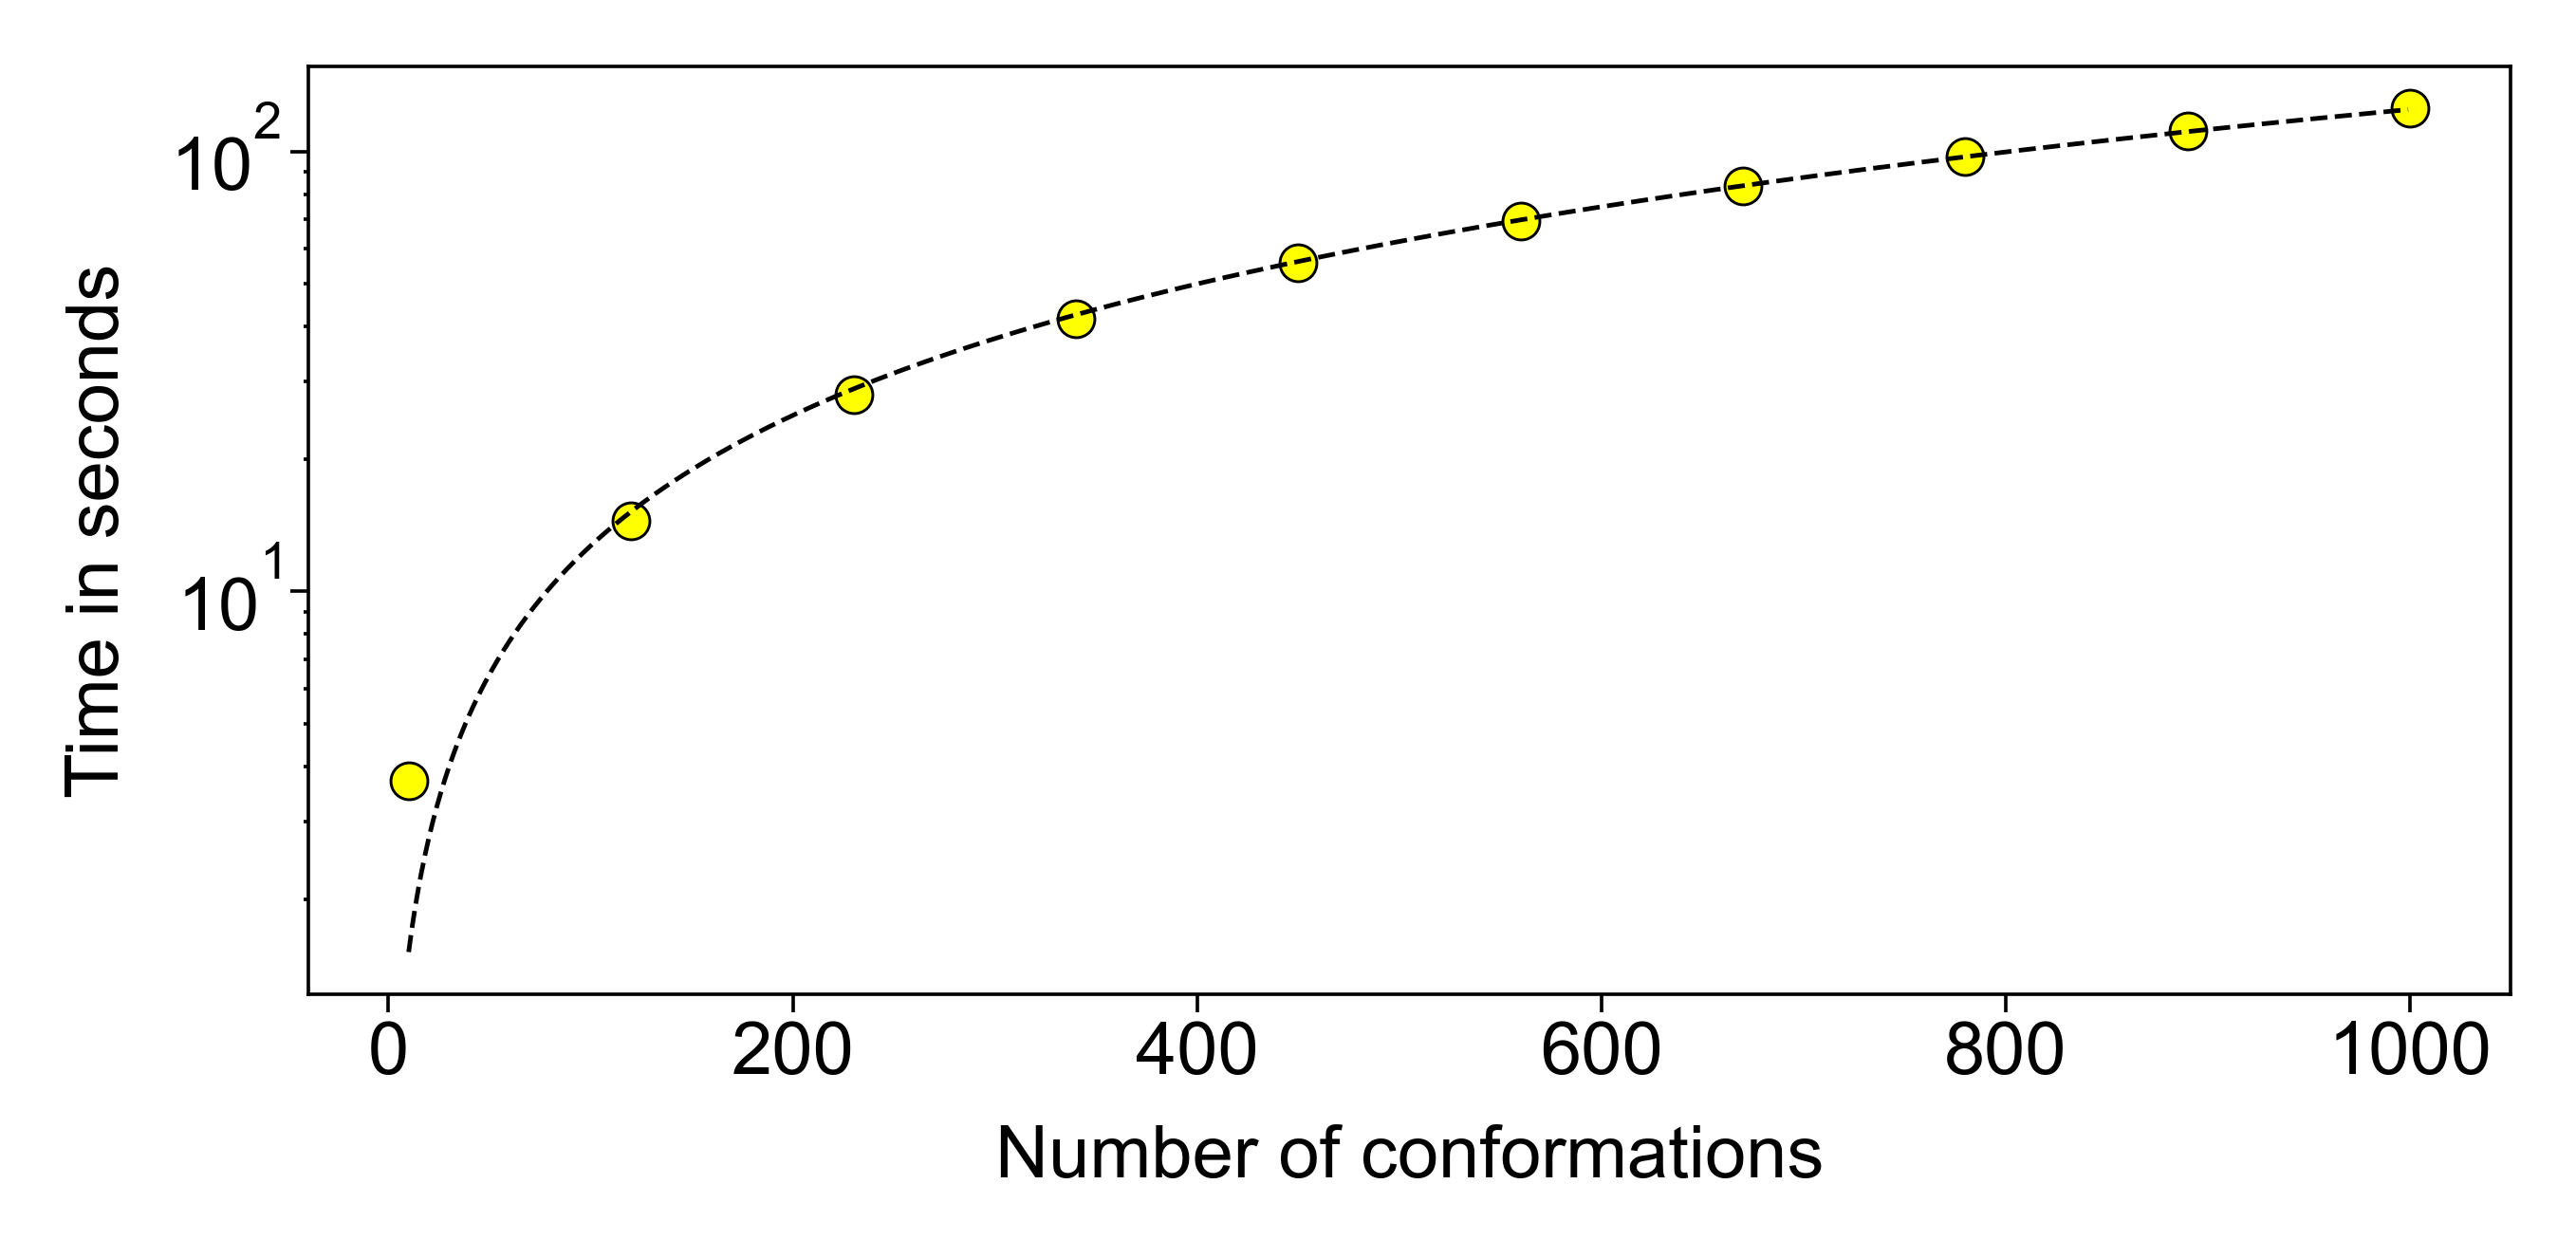

In [21]:
figure(None, (4,2), dpi=350)

ax = plt.gca()

plt.plot(runtimes.transpose()[0], runtimes.transpose()[1],'o',mew=0.3, color='yellow',mec='k', ms=4)

plt.xlabel('Number of conformations', fontsize=8)
plt.ylabel('Time in seconds', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
f = np.polyfit(runtimes.transpose()[0], runtimes.transpose()[1],1)
xvals = np.arange(10,1000)
yvals = xvals*f[0] + f[1]

plt.plot(xvals, yvals,'--k',lw=0.5)
#plt.ylim([0,18])
#plt.text(0, 16.800, 'A4000 GPU memory (16,376 MiB)', fontsize=5, color='r')
plt.tight_layout()
plt.yscale('log')

print(f'Time for 400 confomers: {400*f[0] + f[1]}')
plt.savefig('gtx_1660_benchmark.pdf')
